### Homework 01
#### Benjamin Fry (bfry2@jhu.edu)
#### Advanced Seminar in Membrane Structure, Function, and Pharmacology
#### 09/11/21

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Question 1
Record Z, A, and N values for each quasimolecular part as reported by tables 1 and 3

In [2]:
labels = ["CH3", "iCH2", "mCH2", "oCH2", "C=C", "COO", "GLYC", "PO4", "CHOL", "H2O"]
Z_qmp = [0.0, 2.97, 5.86, 12.85, 7.88, 15.97, 18.67, 20.19, 21.89, 22.51]
A_qmp = [2.95, 2.74, 4.21, 5.14, 4.29, 2.73, 2.37, 3.08, 3.48, 4.63]
N_qmp = [2, 2.74, 8.51, 16.75, 2, 2, 1, 1, 1, 5.36]

Define the gaussian distribution function that will generate our probability densities.

In [3]:
#Equation 1 in paper
def gaussian_distribution(z, Z, A, N):
    constant = (N / (A * np.sqrt(np.pi)))
    exponential = np.exp( - ((z - Z) / A) ** 2)
    return constant * exponential

Calculate the probability density of each quasimolecular piece. <br>
CH2 groups handled separately to account for the fact thast they are split into 3 pieces, sum each for full distn. <br>
Reflect across x = 0, to account for symmetry of membrane.

In [4]:
xrange = np.arange(-40, 40, 0.1);
cond_labels = ["CH3", "CH2", "C=C", "COO", "GLYC", "PO4", "CHOL", "H2O"]
densities = []
for idx, label in enumerate(labels):
    Zi = Z_qmp[idx]
    Ai = A_qmp[idx]
    Ni = N_qmp[idx]
    
    #Handle CH2 being split into 3 components.
    if idx == 1 or idx == 2 or idx == 3:
        if idx == 3:
            prob_dens = gaussian_distribution(xrange, Z_qmp[1], A_qmp[1], N_qmp[1]) + gaussian_distribution(xrange, Z_qmp[2], A_qmp[2], N_qmp[2]) + gaussian_distribution(xrange, Zi, Ai, Ni)
            densities.append(prob_dens)
        continue
        
    #All other QMPs are just plotted from gaussian.
    prob_dens = gaussian_distribution(xrange, Zi, Ai, Ni)
    densities.append(prob_dens)

#Reflect across x=0 and sum for symmetric density.
sym_densities = []
for i,j in enumerate(cond_labels):
    sym_density = np.flip(densities[i]) + densities[i]
    sym_densities.append(sym_density)

Create a plot based on the densities of the form of Figure 3A

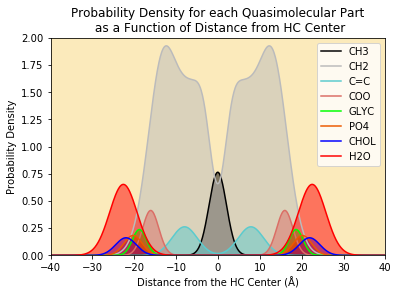

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=1)
colors = [(0, 0, 0), (187, 187, 187), (91, 203, 206), (219, 110, 102), (0, 255, 0), (236, 89, 0), (0, 0, 255), (255, 0, 0)]
colors = [(x[0]/255, x[1]/255, x[2]/255) for x in colors]
for i,j in enumerate(cond_labels):
    plt.plot(xrange, sym_densities[i], color=colors[i])
    plt.fill(xrange, sym_densities[i], facecolor=colors[i], alpha=0.5)
plt.legend(cond_labels)
plt.axis([-40, 40, 0, 2.0])
plt.xlabel("Distance from the HC Center (Å)")
plt.ylabel("Probability Density")
plt.title("Probability Density for each Quasimolecular Part\n as a Function of Distance from HC Center")
background_color = [x/255 for x in (251, 234, 187)]
ax.set_facecolor(background_color)

### Question 2
#### Sub-Part A

Get scattering lengths for both neutrons and xrays from data

In [6]:
# "CH3", "CH2", "C=C", "COO", "GLYC", "PO4", "CHOL", "H2O"
bns = [-0.457, -0.083, 0.581, 1.825, 0.124, 2.834, -0.602, -0.168]
bxs = [2.540, 2.257, 3.951, 6.208, 6.490, 13.263, 14.109, 2.822]

Convert probability densities to scattering densities

In [7]:
neutron_densities = []
xray_densities = []
#Create densities by multiplying prob density at each point by scattering length.
for idx,j in enumerate(cond_labels):
    n_scat_dens = bns[idx] * sym_densities[idx]
    neutron_densities.append(n_scat_dens)
    x_scat_dens = bxs[idx] * sym_densities[idx]
    xray_densities.append(x_scat_dens)
    
#Sum the density contributed by each qmp
neutron_density = np.sum(neutron_densities, axis=0)
xray_density = np.sum(xray_densities, axis=0)

#### Sub-Part B

Re-record the known experimental structure factors

In [8]:
# "CH3", "CH2", "C=C", "COO", "GLYC", "PO4", "CHOL", "H2O"
F_obs_neut = [-8.00, -4.51, 4.81, -5.18, -0.59, 0.84, 0, -0.94]
F_obs_xray = [-43.95, -0.52, 5.15, -11.97, 3.38, -2.47, 2.03, -2.24]

Define a function to calculate scattering density from experimental structure factors

In [9]:
def density_from_Fobs(x, F, offset_constant):
    L = 49.1 #unit cell length
    F0 = offset_constant #Empirical Fit constant

    fourier_series = sum([fh * np.cos(2*np.pi*(h+1)*x/L) for h, fh in enumerate(F)])
    return (1/L) * (F0 + 2 * fourier_series) 

Create plot of neutron scatering density from experimental structure factors and from calc(1) solution

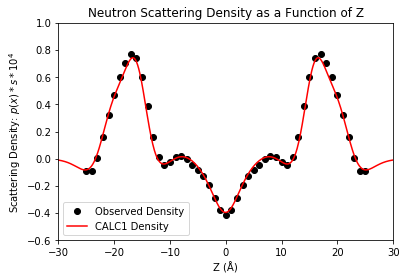

In [10]:
neutron_density_offset = 7
sparser_xrange = np.arange(-25, 26, 1);
obs_neutron_density = [density_from_Fobs(x, F_obs_neut, neutron_density_offset) for x in sparser_xrange]

plt.plot(sparser_xrange, obs_neutron_density, 'ok')
plt.plot(xrange, neutron_density, 'r')
plt.legend(["Observed Density", "CALC1 Density"])
plt.title("Neutron Scattering Density as a Function of Z")
plt.xlabel("Z (Å)")
plt.ylabel("Scattering Density: $p(x)*s*10^4$")
plt.axis([-30, 30, -0.6, 1]);

Create plot of x-ray scatering density from experimental structure factors and from calc(1) solution

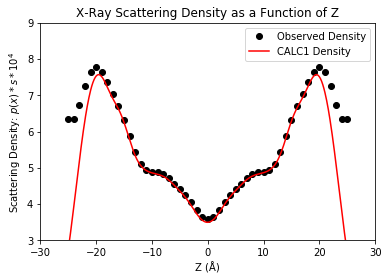

In [11]:
xray_density_offset = 277
obs_xray_density = [density_from_Fobs(x, F_obs_xray, xray_density_offset) for x in sparser_xrange]
plt.plot(sparser_xrange, obs_xray_density, 'ok')
plt.plot(xrange, xray_density, 'r')
plt.legend(["Observed Density", "CALC1 Density"])
plt.title("X-Ray Scattering Density as a Function of Z")
plt.xlabel("Z (Å)")
plt.ylabel("Scattering Density: $p(x)*s*10^4$")
plt.axis([-30, 30, 3, 9]);

### Question 3

#### Calculate the R value between observed and calculated structure factors.

Use calculated structure factors from paper to calculate the R value between Fexp and Fobs

In [12]:
# "CH3", "CH2", "C=C", "COO", "GLYC", "PO4", "CHOL", "H2O"
F_calc_neut_paper = [-7.16, -4.40, 4.59, -5.31, -0.56, 0.84, -0.01, -0.98]
F_calc_xray_paper = [-44.04, -0.46, 5.31, -12.00, 3.56, -2.59, 1.99, -1.92]

Define a function to calculate R vlaue from the two structure factor calculations.

In [13]:
def calculate_R(F_obs, F_calc):
    difference = sum([np.abs(np.abs(fc) - np.abs(fo)) for fo, fc  in zip(F_obs, F_calc)])
    denominator = sum([np.abs(fc) for fc in F_obs])
    return difference / denominator

Report the R values below

In [14]:
neutron_R = calculate_R(F_obs_neut, F_calc_neut_paper)
xray_R = calculate_R(F_obs_xray, F_calc_xray_paper)
print("R_neutron: ", neutron_R, "\nR_xray: ", xray_R)

R_neutron:  0.05548854041013264 
R_xray:  0.013945056477478663


### Question 4
#### Calculate calculated Structure Factors from model

Redefine scattering lengths, Zs, As, and Ns for each piece.<br>
Needed to redefine scattering lengths with copies for the CH2 copies.

In [15]:
labels = ["CH3", "iCH2", "mCH2", "oCH2", "C=C", "COO", "GLYC", "PO4", "CHOL", "H2O"]
#I presume the scattering length for CH2 is the same for i,m, and o qmps
bns = [-0.457, -0.083, -0.083, -0.083, 0.581, 1.825, 0.124, 2.834, -0.602, -0.168]
bxs = [2.540, 2.257, 2.257, 2.257, 3.951, 6.208, 6.490, 13.263, 14.109, 2.822]
Z_qmp = [0.0, 2.97, 5.86, 12.85, 7.88, 15.97, 18.67, 20.19, 21.89, 22.51]
A_qmp = [2.95, 2.74, 4.21, 5.14, 4.29, 2.73, 2.37, 3.08, 3.48, 4.63]
N_qmp = [2, 2.74, 8.51, 16.75, 2, 2, 1, 1, 1, 5.36]

Define a function to calculate Fcalc for each h given a list of Bs, Ns, As, and Zs<br>
Report calculated structure factors in table printed below.

In [16]:
def calculate_Fcalc(h, B, N, A, Z):
    d = 49.1 #Unit cell length. 
    exponential = lambda q : np.exp( -(np.pi * A[q] * h / d) ** 2 )
    sinusoid = lambda q : np.cos(2 * np.pi * Z[q] * h / d)
    _sum = sum([B[q] * N[q] * exponential(q) * sinusoid(q) for q, _ in enumerate(B)])
    return 2*_sum

F_calc_neutron = [ calculate_Fcalc(h+1, bns, N_qmp, A_qmp, Z_qmp) for h in range(8)]
F_calc_xray = [ calculate_Fcalc(h+1, bxs, N_qmp, A_qmp, Z_qmp) for h in range(8)]

F_calcs = zip(F_calc_neutron, F_calc_xray)
print("CALC(1) Structure Factors")
print("h,\tNeutron,\t\tX-Ray")
for idx, ij in enumerate(F_calcs):
    print(f"{idx+1},\t{ij[0]},\t{ij[1]}")

CALC(1) Structure Factors
h,	Neutron,		X-Ray
1,	-7.15532138450356,	-44.04678822786002
2,	-4.409055359953152,	-0.4533418078011415
3,	4.593013776762372,	5.118650851702551
4,	-5.304862906656418,	-12.004402035799231
5,	-0.5638517658732629,	3.564476449724687
6,	0.8355159415178456,	-2.5919324061199482
7,	-0.005019221592353115,	1.9858772423193525
8,	-0.9850460060155151,	-1.9177322349929535
